In [1]:
# importing libraries 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, save_model, load_model
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras import applications
import cv2 
from os import listdir
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, AveragePooling2D,BatchNormalization
from tensorflow.keras.models import Model
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import random
import seaborn as sns
import cv2
import os

from pathlib import Path
from tensorflow.keras.utils import to_categorical
from collections import Counter
from plotly.subplots import make_subplots
from tensorflow.keras.layers.experimental import preprocessing as ps
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
import glob
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.8.0
keras version 2.8.0
gpu is  available


In [2]:
file = open('X_train.pkl', 'rb')
X_train = pickle.load(file)

file = open('y_train.pkl', 'rb')
y_train = pickle.load(file)

file = open('X_test.pkl', 'rb')
X_test = pickle.load(file)

file = open('y_test.pkl', 'rb')
y_test = pickle.load(file)

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11774, 80, 80, 3)
(11774, 49)
(2940, 80, 80, 3)
(2940, 49)


# VGG19 Model

In [4]:
base_model = tf.keras.applications.VGG19(
   include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(80, 80, 3),
    pooling='max',
    classes=49,
    classifier_activation="softmax",
)

In [5]:
num_of_class = 49
epoch = 50

model = Sequential()
model.add(base_model)
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(num_of_class, activation='softmax'))

model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 49)                3185      
                                                                 
Total params: 20,101,489
Trainable params: 20,101,489
Non-trainable params: 0
_________________________________________________________________


In [7]:
H = model.fit(
    x=X_train,
    y=y_train,
    batch_size=29,
    epochs=epoch,
    validation_data=(X_test, y_test))

Epoch 1/50
406/406 [==============================] - 44s 102ms/step - loss: 3.9307 - accuracy: 0.0192 - val_loss: 3.8919 - val_accuracy: 0.0204
Epoch 2/50
406/406 [==============================] - 41s 100ms/step - loss: 3.8927 - accuracy: 0.0183 - val_loss: 3.8919 - val_accuracy: 0.0204
Epoch 3/50
406/406 [==============================] - 41s 100ms/step - loss: 3.8927 - accuracy: 0.0211 - val_loss: 3.8919 - val_accuracy: 0.0204
Epoch 4/50
406/406 [==============================] - 40s 98ms/step - loss: 3.8927 - accuracy: 0.0210 - val_loss: 3.8919 - val_accuracy: 0.0204
Epoch 5/50
406/406 [==============================] - 40s 98ms/step - loss: 3.8926 - accuracy: 0.0212 - val_loss: 3.8919 - val_accuracy: 0.0204
Epoch 6/50
406/406 [==============================] - 40s 98ms/step - loss: 3.8926 - accuracy: 0.0224 - val_loss: 3.8920 - val_accuracy: 0.0204
Epoch 7/50
406/406 [==============================] - 40s 98ms/step - loss: 3.8927 - accuracy: 0.0200 - val_loss: 3.8920 - val_accura

### VGG19 Model Accuracy and loss visualization

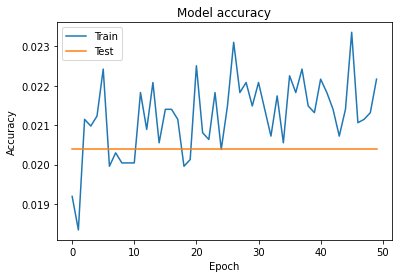

In [8]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

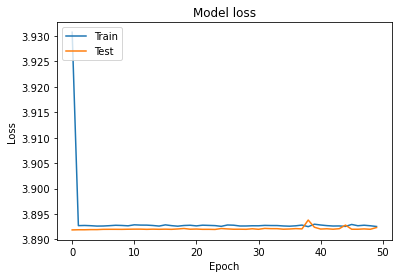

In [9]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Model evaluation with classification report and confusion matrix

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        60
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00        60
          11       0.00      0.00      0.00        60
          12       0.02      1.00      0.04        60
          13       0.00      0.00      0.00        60
          14       0.00      0.00      0.00        60
          15       0.00      0.00      0.00        60
          16       0.00      0.00      0.00        60
     

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(249.0, 0.5, 'Predicted')

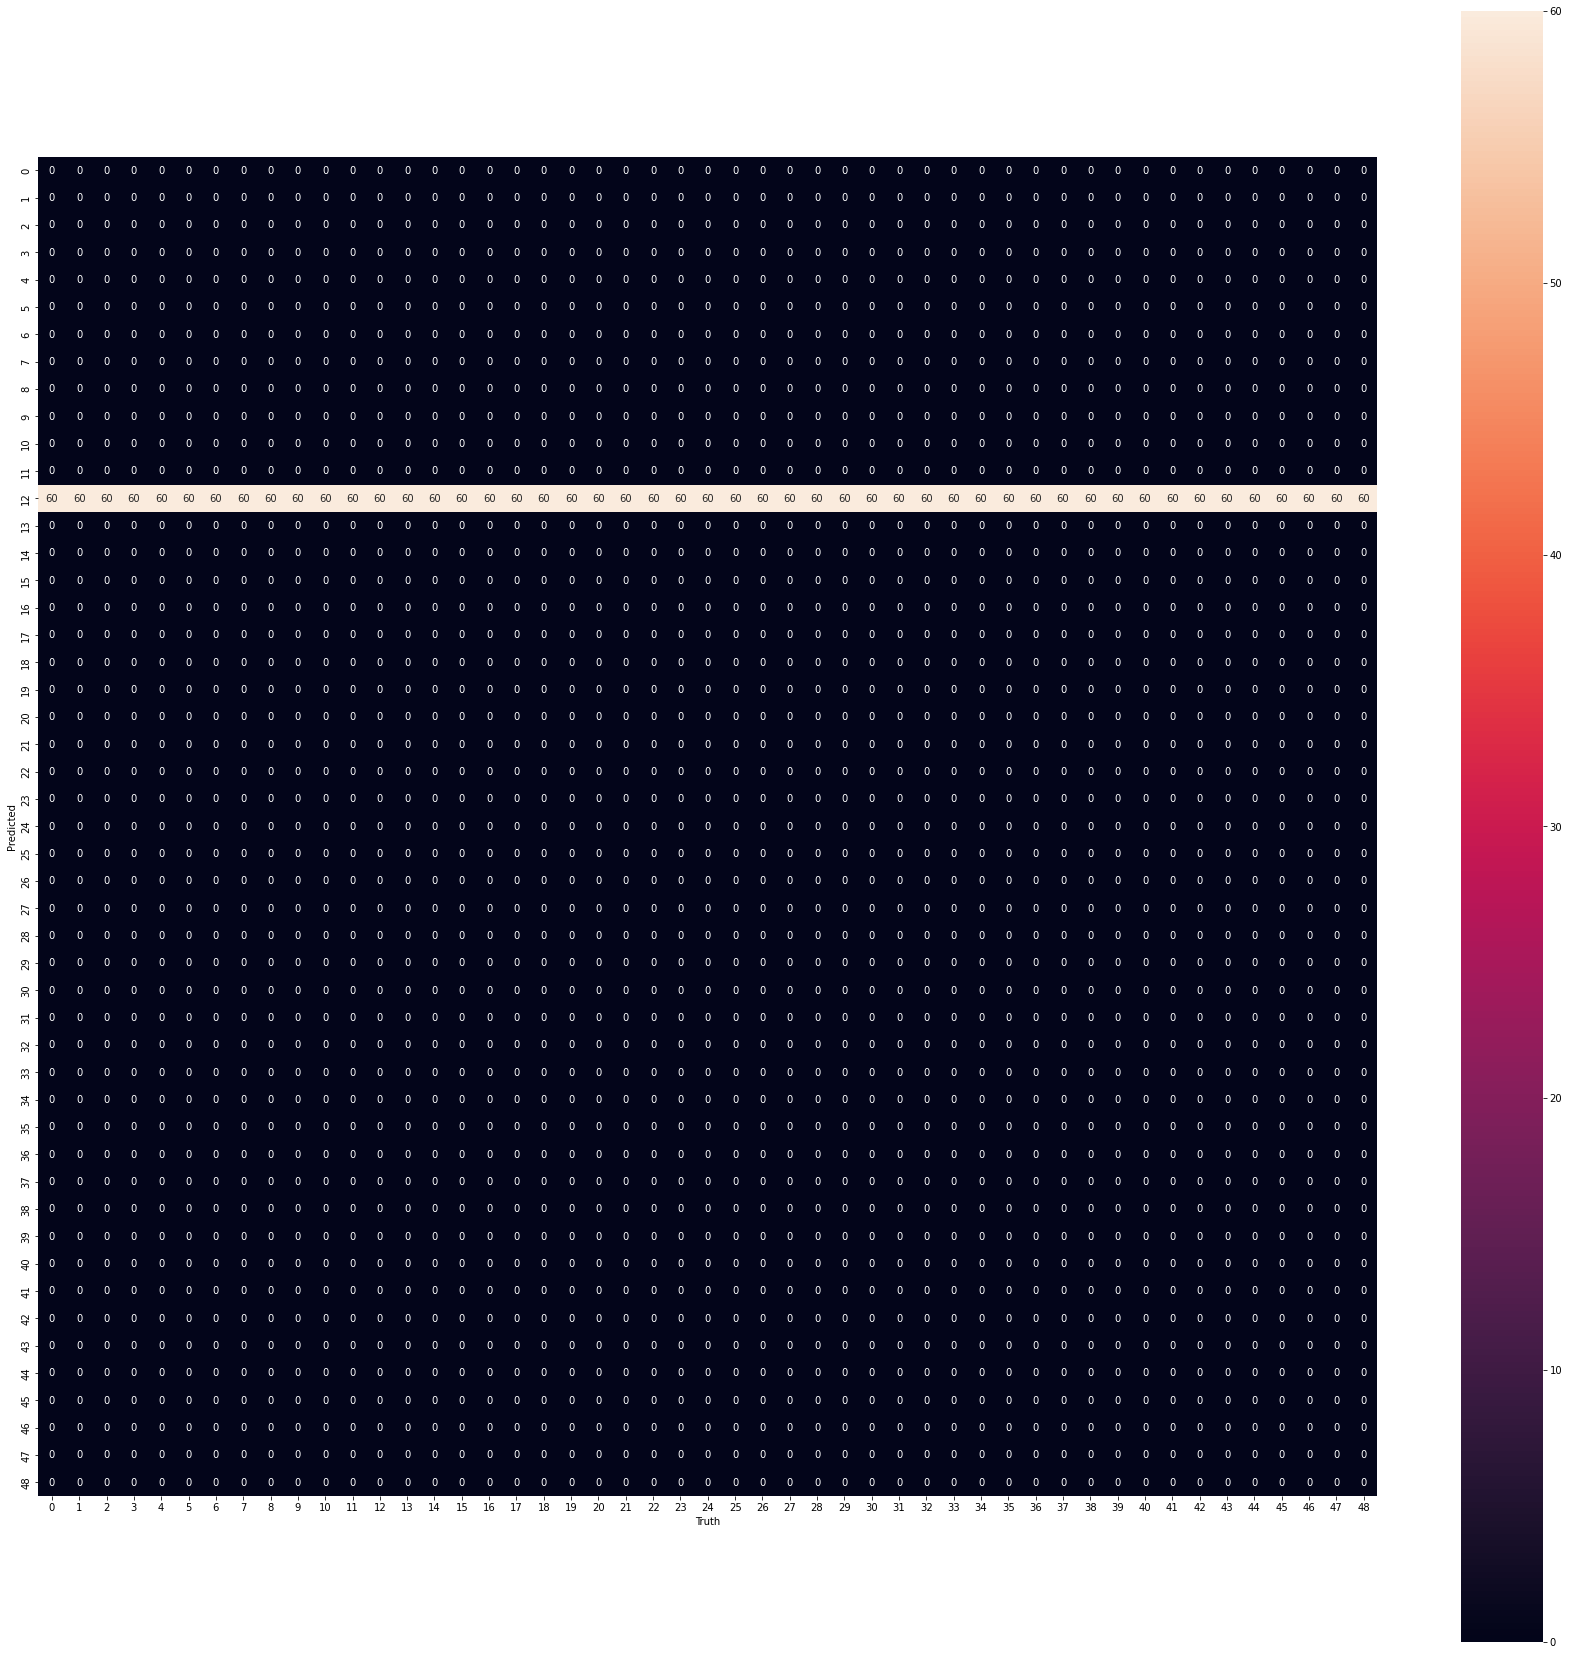

In [10]:
y_pred = np.argmax(model.predict(X_test,batch_size=1), axis=1) 

print('Classification Report')
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
report = classification_report(y_classes, y_pred)
print(report)

plt.figure(figsize=(30,30))
cm = confusion_matrix(y_classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [11]:
#model.save('./BDSL_xception_model.hdf5')